# Лабораторная 11. Персептрон

In [29]:
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# sklearn
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

df=pd.read_csv('CO2_emission.csv')
cols_drop = ['Model_Year','Make','Model', 'Transmission', 'Vehicle_Class', 'Fuel_Consumption_comb(L/100km)', 'CO2_Emissions']
df = df.drop(columns=cols_drop)
X=df.iloc[:,:4]
y=df.iloc[:,4]

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)
print(X_sm.shape)
print(X.shape)
df_new_sm=pd.concat([X_sm, y_sm], axis=1)
df_new_sm.shape

df = df_new_sm
df.head(10)

(1210, 4)
(935, 4)


,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Smog_Level
0,2.4,4,9.9,7.0,3
1,3.5,6,11.1,10.8,3
2,2.0,4,11.0,8.6,6
3,2.0,4,11.3,9.1,6
4,2.0,4,11.2,8.0,7
5,2.0,4,11.3,8.1,7
6,2.0,4,10.0,7.2,3
7,2.0,4,10.5,7.7,3
8,2.9,6,13.5,9.3,3
9,2.0,4,10.3,8.1,3


In [30]:
df['Категория'] = pd.cut(df['Smog_Level'], bins=[0, 4, 7], labels=[0, 1]).astype(int)
from sklearn import preprocessing
X_train = df.iloc[:,:4]
X_normalized = preprocessing.normalize(X_train, norm='l2')
frame = pd.DataFrame(X_normalized, columns = ['Engine_Size','Cylinders','Fuel_Consumption_in_City(L/100 km)','Fuel_Consumption_in_City_Hwy(L/100 km)'])
frame['Категория'] = df['Категория']
df = frame
df.head(5)

,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Категория
0,0.184741,0.307902,0.762057,0.538828,0
1,0.206204,0.353492,0.653960,0.636286,0
2,0.136412,0.272823,0.750264,0.586570,1
3,0.131733,0.263466,0.744291,0.599385,1
4,0.138197,0.276395,0.773906,0.552790,1


Class 0: 573
Class 1: 637
Пропорция: 0.9 : 1


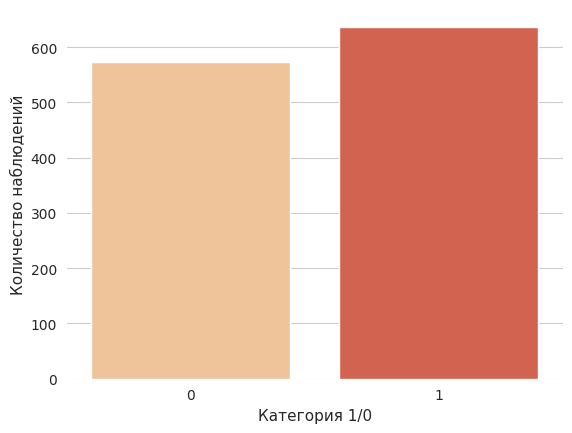

In [31]:
target_count = df.Категория.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])

print('Пропорция:', round(target_count[0] / target_count[1], 2), ': 1')

sns.countplot(x='Категория', data= df, palette="OrRd")
plt.box(False)
plt.xlabel('Категория 1/0',fontsize=11)
plt.ylabel('Количество наблюдений',fontsize=11)
plt.show()

In [32]:
X = df.iloc[:,:4]
y = df.iloc[:,4]

sc = StandardScaler()
X = sc.fit_transform(X)

X_cut = X[:, [0, 1, 3]]

Обучающих данных: (847, 4)
Неверно классифицированные образцы: 122
Точность: 0.66


Text(0.5, 1.1, 'Матрица неточности Персептрон\n')

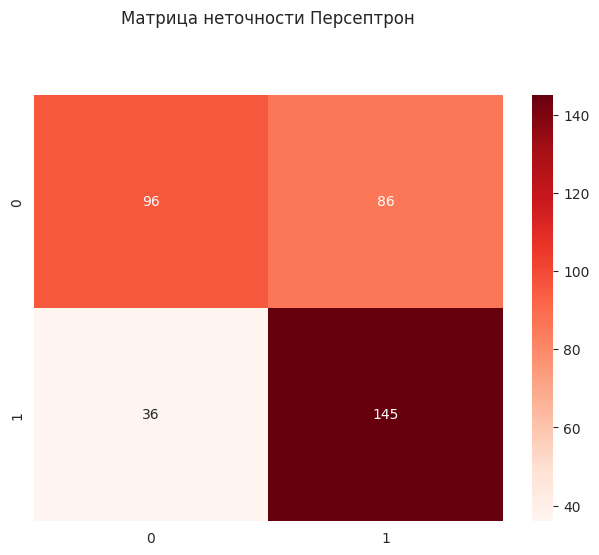

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

ppn = Perceptron(max_iter=10000, random_state=0)
ppn.fit(X_train,y_train)
y1 = ppn.predict(X_test)
print('Обучающих данных:', X_train.shape)
print('Неверно классифицированные образцы: %d' % (y_test != y1).sum())
print('Точность: %.2f' % accuracy_score(y_test, y1))

# матрица неточности

cnf_matrix_log = confusion_matrix(y_test, y1)
sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
plt.tight_layout()
plt.title('Матрица неточности Персептрон\n', y=1.1)

Обучающих данных: (847, 4)
Неверно классифицированные образцы: 73
Точность: 0.80


Text(0.5, 1.1, 'Матрица неточности Персептрон\n')

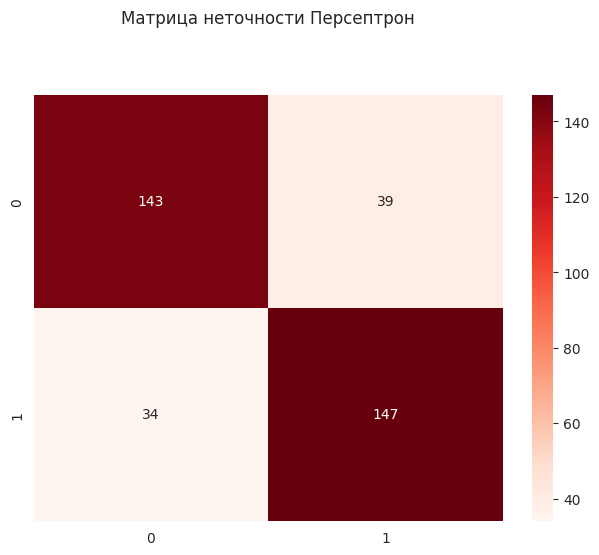

In [34]:
mlp= MLPClassifier(activation='relu', solver='lbfgs', alpha=1e-5, max_iter=10000, hidden_layer_sizes=(5,), random_state=1)
mlp.fit(X_train,y_train)
mlp_pred = mlp.predict(X_test)
print('Обучающих данных:', X_train.shape)
print('Неверно классифицированные образцы: %d' % (y_test != mlp_pred).sum())
print('Точность: %.2f' % accuracy_score(y_test, mlp_pred))

# матрица неточности

cnf_matrix_log = confusion_matrix(y_test, mlp_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
plt.tight_layout()
plt.title('Матрица неточности Персептрон\n', y=1.1)

### ROC

In [35]:
y_score = ppn.predict(X_test)
y_score

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,

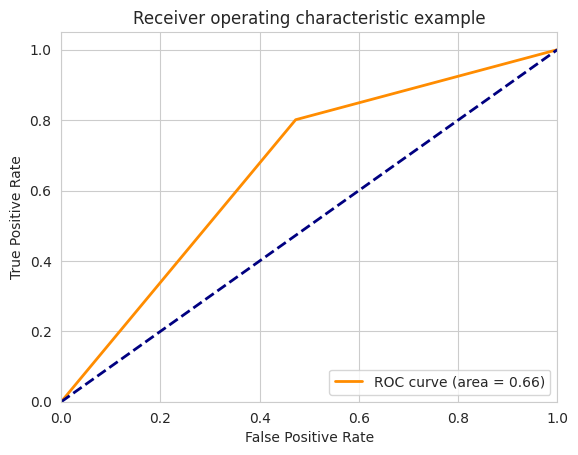

In [36]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
# ROC - анализ
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test > 0, y_score  > 0)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Сокращенный набор

Обучающих данных: (847, 3)
Неверно классифицированные образцы: 124
Точность: 0.66


Text(0.5, 1.1, 'Матрица неточности Персептрон\n')

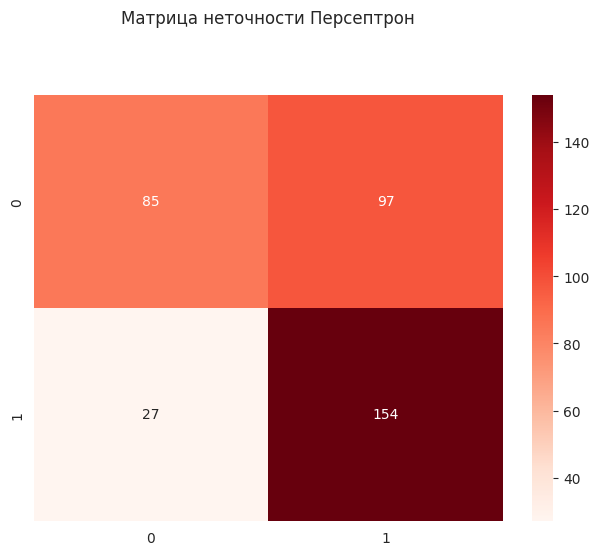

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_cut, y, test_size = 0.3, random_state = 0)

ppn = Perceptron(max_iter=10000, random_state=0)
ppn.fit(X_train,y_train)
y1 = ppn.predict(X_test)
print('Обучающих данных:', X_train.shape)
print('Неверно классифицированные образцы: %d' % (y_test != y1).sum())
print('Точность: %.2f' % accuracy_score(y_test, y1))

# матрица неточности

cnf_matrix_log = confusion_matrix(y_test, y1)
sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
plt.tight_layout()
plt.title('Матрица неточности Персептрон\n', y=1.1)

Обучающих данных: (847, 3)
Неверно классифицированные образцы: 92
Точность: 0.75


Text(0.5, 1.1, 'Матрица неточности Персептрон\n')

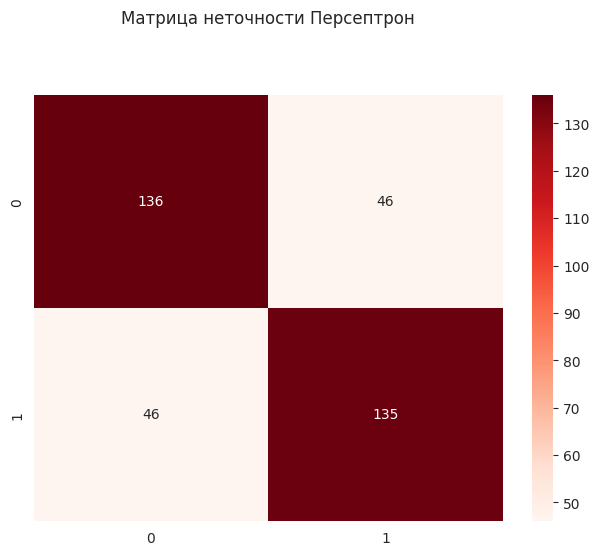

In [38]:
mlp= MLPClassifier(activation='relu', solver='lbfgs', alpha=1e-5, max_iter=10000, hidden_layer_sizes=(5,), random_state=1)
mlp.fit(X_train,y_train)
mlp_pred = mlp.predict(X_test)
print('Обучающих данных:', X_train.shape)
print('Неверно классифицированные образцы: %d' % (y_test != mlp_pred).sum())
print('Точность: %.2f' % accuracy_score(y_test, mlp_pred))

# матрица неточности

cnf_matrix_log = confusion_matrix(y_test, mlp_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
plt.tight_layout()
plt.title('Матрица неточности Персептрон\n', y=1.1)

In [39]:
y_score = mlp.predict(X_test)
y_score

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,

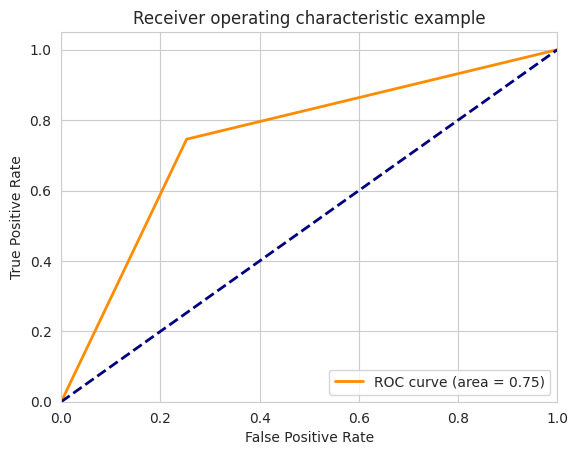

In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
# ROC - анализ
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test > 0, y_score  > 0)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [41]:
y_score = ppn.predict(X_test)
y_score

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,

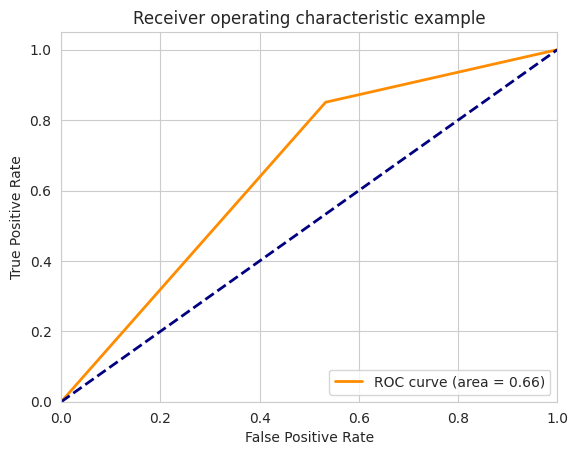

In [42]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
# ROC - анализ
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test > 0, y_score  > 0)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()